In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
def read_file(path):
    f = open(path)
    t =f.read()
    f.close()
    res = [list(map(float,x.split()[1:])) for x in t.split('\n')][:-1]
    res = [list(map(int,x))for x in res]
    df = pd.DataFrame(res,columns=['x','y'])
    df.plot.scatter('x','y')
    return df

In [29]:
#make random clusters
def make_cluster(k):
    xRange = list(range(points.x.min(),points.x.max()))
    yRange = list(range(points.y.min(),points.y.max()))
    clusters = pd.DataFrame({'x':np.random.choice(xRange,k),'y':np.random.choice(yRange,k)})
    plt.scatter(points.x,points.y)
    plt.scatter(clusters.x,clusters.y,c='red')
    return clusters

In [6]:
def move_clusters(alpha,iters):
    global clusters
    for i in range(iters):
        dist = {}
        for id,cluster in clusters.iterrows():
            dist[id] = ((points.x-cluster.x)**2+(points.y-cluster.y)**2)
        cityToCluster = pd.DataFrame(dist).idxmin(axis=1)
        #display(cityToCluster)
        clusters2 = [[row.x,row.y] for id,row in clusters.iterrows()]
        for city,cluster in cityToCluster.iteritems():
            clusters2[cluster][0] += alpha*(points.loc[city][0]-clusters2[cluster][0])
            clusters2[cluster][1] += alpha*(points.loc[city][1]-clusters2[cluster][1])
        clusters = pd.DataFrame(clusters2,columns=['x','y'])
    return cityToCluster

In [38]:
#make best paths on each cluster
def make_cluster_path():
    orders = []
    for cluster,df in points.groupby('cluster',sort=True):
        df = df.drop('cluster',axis=1)
        minPer = None
        minCost = None
        print(f'cluster of size:{len(df)}')
        c=0
        for permut in itertools.permutations(df.index):
            c+=1
            if(c%30000==0):print(f'{c}-',end='')
            perm = df.loc[list(permut)].reset_index(drop=True)
            perm1 = perm[0:-1]
            perm2 = perm[1:].reset_index(drop=True)
            cost = sum(np.sqrt((perm1.x-perm2.x)**2+(perm1.y-perm2.y)**2))
            if(minCost==None or minCost>cost):
                minCost = cost
                minPer = list(permut)
        orders.append(minPer)
        print()
        print(f'cluster {cluster} is finished!')
    for order in orders:
        temp = points.loc[order]
        plt.plot(temp.x,temp.y)
    plt.show()
    return orders

In [20]:
def connect_clusters():    
    def dist(p1,p2):
        return np.sqrt((p1.x-p2.x)**2+(p1.y-p2.y)**2)
    def find_pair(start):
        for x in start_end:
            if(x[0]==start):return x[-1]
            if(x[-1]==start):return x[0]

    ki_be_ki = {}
    start_end = [[order[0],order[-1]]for order in orders]
    start_end_set = set(np.array(start_end).ravel())
    end = np.random.choice(list(start_end_set))
    realStart = find_pair(end)
    clu = points.loc[end].cluster
    start_end_set.remove(start_end[clu][0])
    try:start_end_set.remove(start_end[clu][1])
    except:pass
    for i in range(len(orders)-1):
        #conncet to minimum distance
        dists = [[sar,dist(points.loc[end],points.loc[sar])] for sar in start_end_set]
        start = min(dists,key = lambda t: t[1])[0]
        ki_be_ki[end]=start
        #ki_be_ki[start]=end
        end = find_pair(start)
        #remove from set
        clu = points.loc[end].cluster
        start_end_set.remove(start_end[clu][0])
        try:start_end_set.remove(start_end[clu][1])
        except:pass
    ki_be_ki[end]=realStart
    for order in orders:
        temp = points.loc[order]
        plt.plot(temp.x,temp.y)
    for key in ki_be_ki:
        temp1 = points.loc[key]
        temp2 = points.loc[ki_be_ki[key]]
        plt.plot([temp1.x,temp2.x],[temp1.y,temp2.y],c='black')
    plt.show()
    return ki_be_ki

First we should read the file

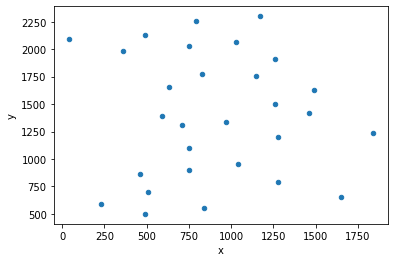

In [3]:
points = read_file('D:\\1.tsp')

now we make some random clusters

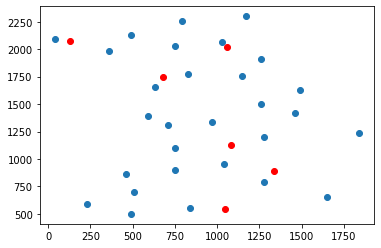

In [13]:
clusters = make_cluster(6)

next we should use SOM to take each city to one cluster

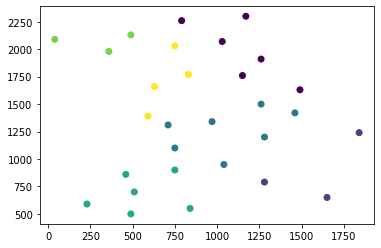

In [14]:
cityToCluster = move_clusters(0.01,400)
points['cluster'] = cityToCluster
plt.scatter(data=points,x='x',y='y',c='cluster')
pass

now that we now we have small number of citys in each cluster, we can find best path in that cluster

cluster 0 is finished!
cluster 1 is finished!
cluster 2 is finished!
cluster 3 is finished!
cluster 4 is finished!
cluster 5 is finished!


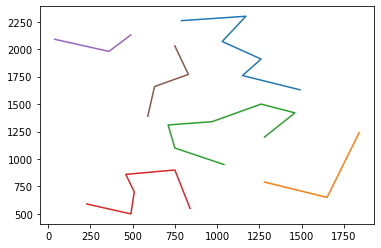

In [15]:
orders = make_cluster_path()

now connect the paths with greedy algorithm that always choose nearest heads of clusters

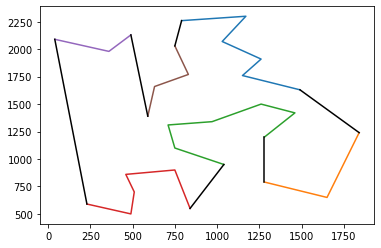

{10: 18, 15: 24, 22: 7, 8: 4, 19: 25, 2: 16}

In [24]:
connect_clusters()

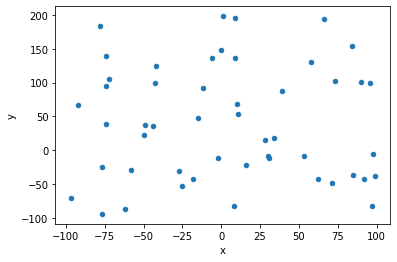

In [25]:
points = read_file('D:\\2.tsp')

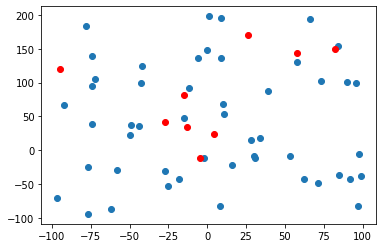

In [32]:
clusters = make_cluster(9)

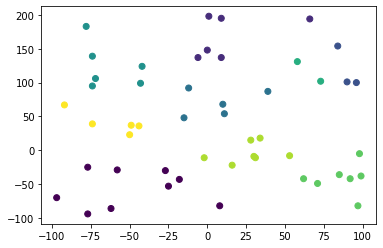

In [33]:
cityToCluster = move_clusters(0.01,400)
points['cluster'] = cityToCluster
plt.scatter(data=points,x='x',y='y',c='cluster')
pass

cluster of size:9
30000-60000-90000-120000-150000-180000-210000-240000-270000-300000-330000-360000-
cluster 0 is finished!
cluster of size:6

cluster 1 is finished!
cluster of size:3

cluster 2 is finished!
cluster of size:5

cluster 3 is finished!
cluster of size:6

cluster 4 is finished!
cluster of size:2

cluster 5 is finished!
cluster of size:7

cluster 6 is finished!
cluster of size:7

cluster 7 is finished!
cluster of size:5

cluster 8 is finished!


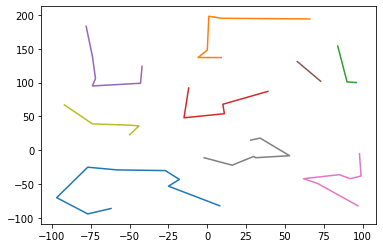

In [39]:
orders = make_cluster_path()

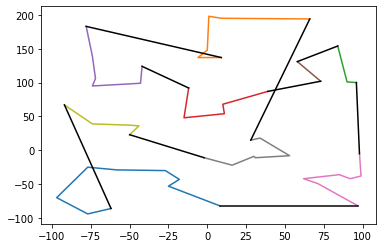

{27: 44, 3: 43, 36: 23, 30: 45, 38: 16, 25: 0, 33: 48, 22: 10, 21: 6}

In [50]:
connect_clusters()